In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
# from colormaps import parula
from scipy import stats
import numpy as np
from sklearn.metrics import mean_squared_error
from matplotlib import colors, cm
from scipy.stats import linregress
from scipy.stats import gaussian_kde
from statistics import mean

In [5]:
import matplotlib as mpl
mpl.rcParams.update(
    {
    'text.usetex': False,
    'font.family': 'stixgeneral',
    'mathtext.fontset': 'stix',
    "font.family":'serif',
    "font.size": 14,
    "mathtext.fontset":'stix',
    "font.serif": ['Times New Roman'],
    "font.weight":"bold",
    }
    )

In [6]:
def get_regression_line(real, pred, data_range=(0, 1)):
    # 拟合（若换MK，自行操作）最小二乘
    def slope(xs, ys):
        m = (((mean(xs) * mean(ys)) - mean(xs * ys)) / ((mean(xs) * mean(xs)) - mean(xs * xs)))
        b = mean(ys) - m * mean(xs)
        return m, b
    k, b = slope(real, pred)
    regression_line = []
    for a in range(data_range[0], data_range[1]):
        regression_line.append((k * a) + b)
    return regression_line

不同的年份进行计算分析，2021年最好

In [12]:
crc_data2021=pd.read_excel(r"E:\ESSD_crc_rf\Dujia_crc\songneng_last.xlsx")
crc_data2021.head()

,2021_C_SNP,2021_C_li
0,269.341003,708.846985
1,166.475006,605.559998
2,256.329010,695.172974
3,287.398010,725.870972
4,236.826996,675.242004


In [13]:
x=crc_data2021['2021_C_SNP']/1000
y=crc_data2021['2021_C_li']/1000

In [14]:
def get_regression_line(real, pred, data_range=(0, 1)):
    def slope(xs, ys):
        m = (((mean(xs) * mean(ys)) - mean(xs * ys)) / ((mean(xs) * mean(xs)) - mean(xs * xs)))
        b = mean(ys) - m * mean(xs)
        return m, b
    k, b = slope(real, pred)
    regression_line = []
    for a in range(data_range[0], data_range[1]+1):
        regression_line.append((k * a) + b)
    return regression_line,k,b

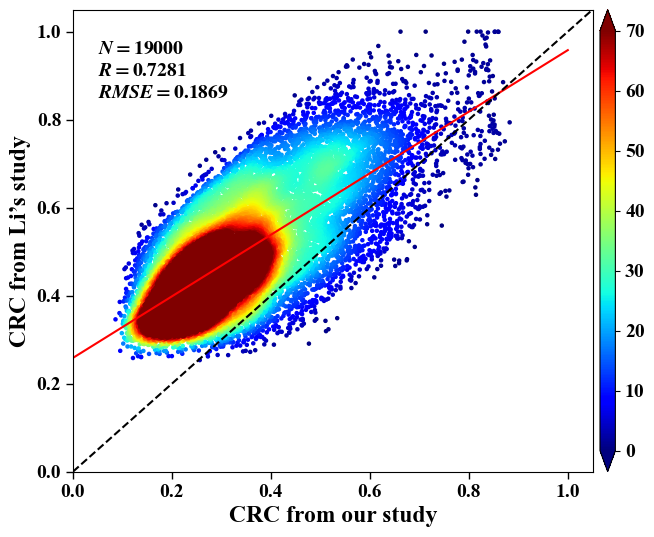

In [15]:
#  开始绘图
fig,ax=plt.subplots(figsize=(8,6))
# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = x.iloc[idx], y.iloc[idx], z[idx] 
# 还可以设置图例的位置和颜色形状等
scatter = ax.scatter(x,y,marker='o',c=z*10,edgecolors=None,s=5, cmap='jet',vmin=0, vmax=70)
norm = colors.Normalize(0,70)
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap="jet"),extend='both',
                    pad=0.012, orientation='vertical', aspect=30, ax=ax)
# cbar=plt.colorbar(scatter,shrink=1,orientation='vertical',extend='both',pad=0.015,aspect=30)
regression_line = get_regression_line(x,y,data_range=(0,1))
ax.plot(regression_line[0], 'r-', lw=1.5) # 绘制回归线
# BIAS = mean(x - y)
MSE = mean_squared_error(x, y)
RMSE = np.power(MSE, 0.5)
R = np.corrcoef(x, y)[0, 1]
ax.text(0.05, 0.95, '$N=%.f$' % len(y), family = 'Times New Roman')
ax.text(0.05, 0.9, '$R=%.4f$' % R, family = 'Times New Roman')
ax.text(0.05, 0.85, '$RMSE=%.4f$' % RMSE, family = 'Times New Roman')
# ax.text(0.05, 0.8, r'$y=$'+str(round(regression_line[1],4))+'$*x$'+" + "+str(round(regression_line[2],4)), family = 'Times New Roman')
plt.plot([0,1.5],[0,1.5],'k--',lw=1.5) # 绘制1:1线
# 设置刻度线长短粗细
ax2=plt.gca()
ax.tick_params(which='major',width=1,length=5)
font3={'family':'Times New Roman','size':17,'color':'k','weight': 'bold'}
plt.xlabel('CRC from our study',fontdict=font3)
plt.ylabel('CRC from Li’s study',fontdict=font3)
plt.xticks()
plt.yticks()
plt.xlim(xmin=0, xmax=1.05)
plt.xticks(np.arange(0, 1.05, 0.2))
plt.ylim(ymin=0, ymax=1.05)
plt.yticks(np.arange(0, 1.05, 0.2))
plt.show()